<a href="https://colab.research.google.com/github/ohjiae/Hotel_canceled_booking_prediction/blob/main/hotel_canceled_booking_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **호텔 예약 취소 & 최적의 오버부킹 비율 예측 모델**
> About Dataset : [Kaggle 'Hotel booking Demand'](https://www.kaggle.com/jessemostipak/hotel-booking-demand) <p> **데이터 개요**
- 리스본과 ㅇㅇ에 있는 호텔의 실제 데이터를 정리해 만든 데이터셋입니다.
- 실제 데이터이므로 일부 데이터는 익명화되어 있습니다.
- 데이터를 활용해 예약한 고객이 예약을 취소할지 예측해, 결론적으로 얼만큼 overbooking을 받는 것이 좋을지 알려주는 모델을 만들어 보겠습니다.

# 1. EDA
## 1) 데이터 및 패키지 불러오기

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Data_Project/hotel_customer_segmentation/data
#!unzip -qq '/content/drive/MyDrive/Data_Project/hotel_customer_segmentation/data/archive.zip'

/content/drive/MyDrive/Data_Project/hotel_customer_segmentation/data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
data = pd.read_csv('./hotel_bookings.csv')

In [ ]:
# 다보여주는 옵션.. 조심하길..
#pd.set_option('display.max_rows', None)

## 2) 데이터 확인

### 1. 데이터
- **[Hotel Booking Demand](https://www.kaggle.com/jessemostipak/hotel-booking-demand)**

<br>

### 2. 컬럼 설명 
* hotel : 호텔의 종류 (H1 : Resort Hotel,  H2 : City Hotel)
* is_canceled : 예약 취소 여부 (1 : 취소 , 0 : 취소 x)
* lead_time :예약 후 도착할 때까지 시간
* arrival_date_year : 도착일(년)
* arrival_date_month : 도착일(월)
* arrival_date_week_number : 도착일(주차)
* arrival_date_day_of_month : 도착일(일)
* stays_in_weekend_nights : 주말 숙박일 수
* stays_in_week_nights : 평일 숙박일 수
* adults : 성인 수
* children : 어린이 수
* babies : 아기 수
* meal : 예약된 식사 유형 (BB, HB, SC, FB, Undefined)
* country : 나라
* market_segment : 시장유형 (Online TA, Offline TA/TO, Groups, Direct, Corporate, Complementary, Aviation, 
Undefined)
* distribution_channel : 유입 경로 (TA/TO : 여행사 투어, Direct, Corporate, GDS, Undefined)
* is_repeated_guest : 재방문 고객 (1 : 재방문)
* previous_cancellations : 이전예약 취소 수
* previous_bookings_not_canceled : 이전예약 미취소 수 
* reserved_room_type : 예약한 객실 유형 (A, B, C, D, E, F, G, H, L, P)
* assigned_room_type : 할당된 객실 유형 (A, B, C, D, E, F, G, H, I, K, L, P)
* booking_changes : 예약 변경 수
* deposit_type : 예약금 유형(No Deposit, Non Refund, Refundable)
* agent : 에이전트ID 
* company : 회사ID
* days_in_waiting_list : 예약 대기일 수
* customer_type : 고객 유형 (Transient, Transient-Party, Contract, Group)
* adr : 평균일일요금(=숙박요금/숙박일수)
* required_car_parking_spaces : 고객별 필요 주차공간
* total_of_special_requests : 고객의 특별 요구사항 수
* reservation_status : 마지막 상태 (Check-Out, Canceled, No-Show)
* reservation_status_date : 마지막 상태인 날짜

<br>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
display(data)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# 컬럼내, 타입별 수
# 데이터프레임으로 변경
for col in data.select_dtypes(include=object):
  print(col,data[col].value_counts(),sep='\n')

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DMA        1
ATF        1
PLW        1
NPL        1
LCA        1
Name: country, Length: 177, dtype: int64
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS      

In [ ]:
# 마지막 상태와 예약 취소 여부 비교 및 확인
data[['reservation_status','is_canceled']].value_counts()

reservation_status  is_canceled
Check-Out           0              75166
Canceled            1              43017
No-Show             1               1207
dtype: int64

### 3. 전체 상관계수 확인

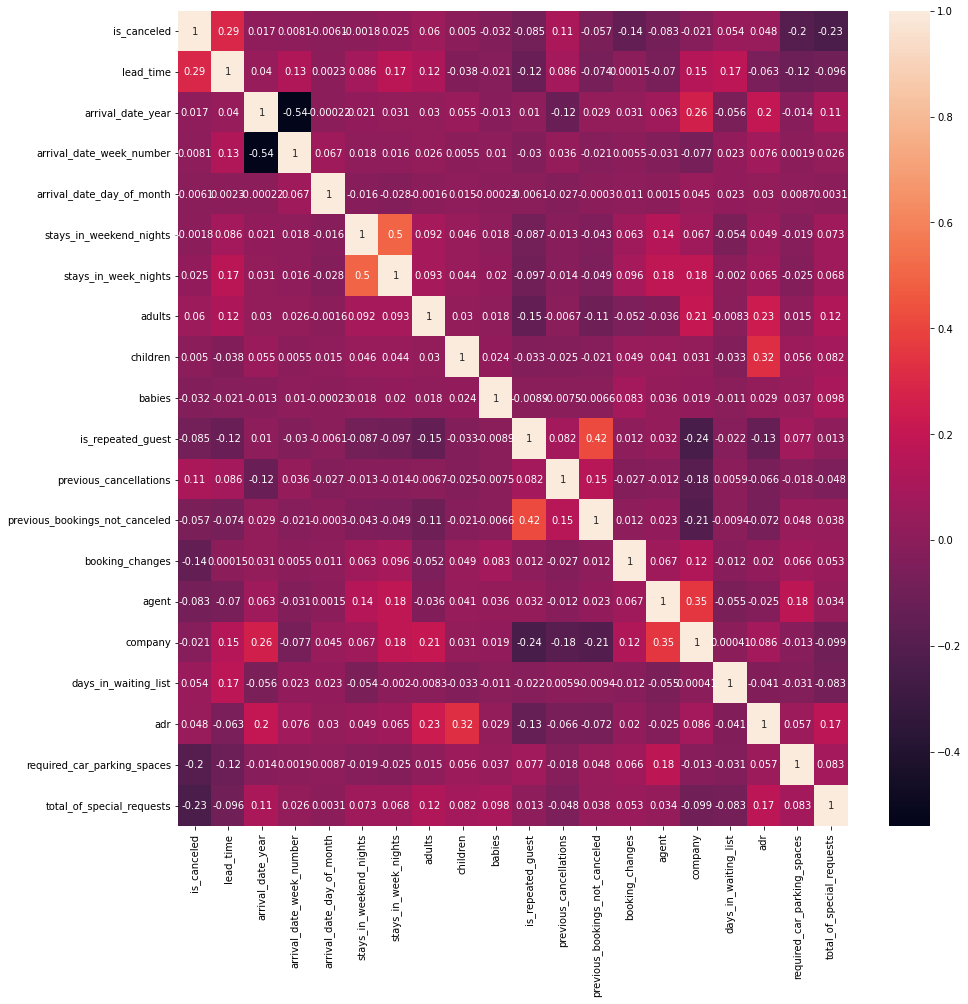

In [ ]:
# 3. 전체 상관계수 확인
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

# 2. 데이터 전처리
## 1) 결측치, 이상치 처리 및 데이터 범주 정리

In [ ]:
# 결측치 비중 확인 (data = 각 data 이름으로 변경해주세요)
for i in range(len(data.columns)):
    if data.iloc[:,i].isnull().sum()>0 :
        temp_col = data.iloc[:,i]
        percentage = temp_col.isnull().sum() / len(temp_col)
        print('{:}의 결측치는 전체의 {:.3%}입니다.'.format(temp_col.name,percentage))

children의 결측치는 전체의 0.003%입니다.
country의 결측치는 전체의 0.409%입니다.
agent의 결측치는 전체의 13.686%입니다.
company의 결측치는 전체의 94.307%입니다.


In [ ]:
# 이상치 확인 (unique 값 정리해서 dict로 만들기)
hotel = data.copy() # 전처리 전 데이터 카피
uniq_dict = {}
# 일단 내 담당인 컬럼만 보기 (내용이 숫자나 문자열이 아닐 시 에러남)
for i in hotel.iloc[:,19:24].columns:
    temp = list(hotel[i].unique())
    uniq_dict[i]= sorted(temp)

#for key, value in uniq_dict.items():
#    print(key,':',value)

# 그룹바이 /시각화 필요.

### (1) 필요없는 컬럼 제거
- conutry : 범주가 너무 많아서 무의미한것으로 판단하여 제거
- agent : id 값이므로 제거
- company : id 값이므로 제거
- deposit_type : 해당 호텔의 카드이슈로 인한 부정확한 값이므로 제거
- reservation_status : 무의미 (is_canceled와 중복)
- reservation_status_date : 무의미 (arrival_date~ 열들과 중복)

In [ ]:
hotel = hotel.drop(['agent','company','deposit_type','country','reservation_status','reservation_status_date'], axis=1)
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### (2) 데이터 이름, 타입 정리
1. 도착 월의 데이터값 숫자로 변경 (ex. January -> '1')
2. 0에 비해 1이상의 값의 분포가 낮으면서 넓은 데이터 정리 및 타입 변경 <br>(previous_cancellations, previous_bookings, booking_changes, days_in_waiting_list, required_car_parking)
3. is_canceled , arrival_date_year , is_repeated_guest 컬럼 속성 범주/연속형으로 변경
4. 식사 컬럼을 먹은 횟수로 변경 <br>('SC', 'Undefined' -> 0, 'BB' -> 1, 'HB' -> 2, 'FB' -> 3) 

In [ ]:
# 1. month를 1~12 숫자로 변경
hotel.loc[hotel.arrival_date_month == 'January', 'arrival_date_month'] = '1'
hotel.loc[hotel.arrival_date_month == 'February', 'arrival_date_month'] = '2'
hotel.loc[hotel.arrival_date_month == 'March', 'arrival_date_month'] = '3'
hotel.loc[hotel.arrival_date_month == 'April', 'arrival_date_month'] = '4'
hotel.loc[hotel.arrival_date_month == 'May', 'arrival_date_month'] = '5'
hotel.loc[hotel.arrival_date_month == 'June', 'arrival_date_month'] = '6'
hotel.loc[hotel.arrival_date_month == 'July', 'arrival_date_month'] = '7'
hotel.loc[hotel.arrival_date_month == 'August', 'arrival_date_month'] = '8'
hotel.loc[hotel.arrival_date_month == 'September', 'arrival_date_month'] = '9'
hotel.loc[hotel.arrival_date_month == 'October', 'arrival_date_month'] = '10'
hotel.loc[hotel.arrival_date_month == 'November', 'arrival_date_month'] = '11'
hotel.loc[hotel.arrival_date_month == 'December', 'arrival_date_month'] = '12'

In [ ]:
# 2. previous_cancellations, previous_bookings, booking_changes, days_in_waiting_list, required_car_parking 명목형(0 -> '0', 1이상 -> '1')으로 바꾸기

hotel['previous_cancellations'] =  np.where(hotel['previous_cancellations']==0,'0','1')
hotel['previous_bookings_not_canceled'] =  np.where(hotel['previous_bookings_not_canceled']==0,'0','1')
hotel['booking_changes'] =  np.where(hotel['booking_changes']==0,'0','1')
hotel['days_in_waiting_list'] =  np.where(hotel['days_in_waiting_list']==0,'0','1')
hotel['required_car_parking_spaces'] =  np.where(hotel['required_car_parking_spaces']==0,'0','1')


In [48]:
# 3. is_canceled , arrival_date_year , is_repeated_guest 컬럼 속성 object로 변경
hotel['is_canceled'] = hotel['is_canceled'].astype(str)
hotel['arrival_date_year'] = hotel['arrival_date_year'].astype(str)
hotel['is_repeated_guest'] = hotel['is_repeated_guest'].astype(str)
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118559 entries, 2 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118559 non-null  object 
 1   is_canceled                     118559 non-null  object 
 2   lead_time                       118559 non-null  int64  
 3   arrival_date_year               118559 non-null  object 
 4   arrival_date_month              118559 non-null  object 
 5   arrival_date_week_number        118559 non-null  int64  
 6   arrival_date_day_of_month       118559 non-null  int64  
 7   adults                          118559 non-null  int64  
 8   children                        118559 non-null  float64
 9   babies                          118559 non-null  int64  
 10  meal                            118559 non-null  int64  
 11  market_segment                  118559 non-null  object 
 12  distribution_cha

In [ ]:
# 4. meal 컬럼 순서형 컬럼으로 변경 ('SC', 'Undefined' -> 0, 'BB' -> 1, 'HB' -> 2, 'FB' -> 3) 
def meal_nums(x):
    if (x =='SC') or (x== 'Undefined'):
        x = 0
    elif x == 'BB':
        x = 1
    elif x == 'HB':
        x = 2
    else:
        x = 3
    return x
 
hotel['meal'] = hotel['meal'].apply(meal_nums)

### (3) 결측치, 이상치 대체 및 제거 
1. Children 컬럼 결측치 0으로 대체
2. 총 숙박인원 == 0 이면 행 삭제
3. 주말 숙박일과 주중 숙박일 컬럼 두 개를 합치고, 총 숙박일이 0인 행 제거
4. 기존의 주말 숙박일, 주중 숙박일 컬럼 제거
5. market_segment , distribution_channel 각각의 값이 'Undefined'인 행 제거
6. 숙박 요금이 0 미만인 행 제거
7. 아이는 있는데 같이 온 어른이 없는 경우 확인하고, 이상치로 간주하고 제거.

In [ ]:
# 1. Children 결측치 0으로 대체
hotel['children'] = hotel['children'].fillna(0)

In [ ]:
# 2. adults , children , babies 값을 모두 합한 총 숙박인원 == 0 이면 행 삭제
hotel.drop(hotel.loc[(hotel['children']==0)&(hotel['adults']==0)&(hotel['babies']==0)].index, inplace=True)

In [ ]:
# 3. stays_in_weekend_nights 와 stays_in_week_nights 값을 합한 stays_nights(총 숙박일수) 변수 생성
hotel['stays_nights'] =  hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights']
# 3-2. stays_nights 가 0인 행 제거
hotel.drop(hotel.loc[(hotel['stays_nights']==0)].index, inplace=True)

In [ ]:
# 4. stays_in_weekend_nights 와 stays_in_week_nights 컬럼 제거
hotel.drop(['stays_in_weekend_nights','stays_in_week_nights'], axis=1, inplace=True)

In [ ]:
# 5. market_segment , distribution_channel 각각의 값이 'Undefined'인 행 제거
hotel = hotel[hotel.market_segment != 'Undefined']
hotel = hotel[hotel.distribution_channel !='Undefined']

In [ ]:
# 6. 숙박 요금이 0 미만인 행 제거
hotel.drop(hotel.loc[(hotel.adr < 0)].index, inplace=True)

In [ ]:
# 7. 'adults'==0 인데 'customer_type'=='Transient'의 경우 확인하고, 이상치로 간주하고 제거.
# Transient - 다른 고객과 관련이 없는 일반 고객(그룹 숙박도, 계약도 아닌 단독건)
hotel[['adults', 'children', 'babies','customer_type']][hotel.adults==0].value_counts().sort_index()
hotel.drop(hotel.loc[(hotel['adults']==0)&(hotel['customer_type']=='Transient')].index, inplace=True)

adults  children  babies  customer_type  
0       1.0       0       Transient            3
                          Transient-Party      1
        2.0       0       Contract             1
                          Group                1
                          Transient          131
                          Transient-Party     72
                  1       Transient            2
                          Transient-Party      1
        3.0       0       Transient            3
                          Transient-Party      8
dtype: int64

### (4) 파생변수 
1. 객실 별 사용 요금과 인원의 관계를 통해 객실 순위 파악하기 위한 변수
    - adr_room : 객실 타입 별 평균 사용 요금
    - total_num : 한 객실의 총 인원 수 
    - people_by_room : 객실 타입 별 숙박인원의 평균

2. DG, SG, UG : 예약한 객실 유형과 실제 배정된 객실 유형이 동일한지 구분하는 변수
    - DG: 더 낮은 객실 유형 배정
    - SG: 동일
    - UG: 더 높은 객실 유형 배정


- 아직 만들어야하는 변수들
    - children_babies_yn : 아이가 있는지 없는지 구분하는 변수 (Y: 아이 있음, N: 아이 없음)
    - arrival_date_quarter : 분기별 구분 변수 (q1 , q2 , q3 , q4)
    - meal_yn : 식사 했는지 안했는지 구분하는 변수 (Y: BB, HB, FB ,  N: SC, Undefined)

In [ ]:
# 1. 객실 별 사용 요금과 인원의 관계를 통해 객실 순위 파악하기
hotel.groupby(['reserved_room_type', 'assigned_room_type'])['adr'].mean()

reserved_room_type  assigned_room_type
A                   A                      93.376106
                    B                      98.777594
                    C                      83.517467
                    D                      74.954013
                    E                      82.194530
                                             ...    
L                   B                     172.000000
                    C                     136.000000
                    F                     200.000000
                    H                     150.000000
                    L                       8.000000
Name: adr, Length: 73, dtype: float64

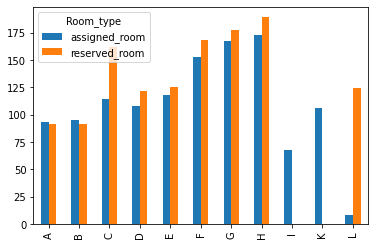

In [40]:
# 예약룸/배정룸 타입 별 adr
adr_by_assigned_room = hotel['adr'].groupby(hotel['assigned_room_type']).mean()
adr_by_reserved_room = hotel['adr'].groupby(hotel['reserved_room_type']).mean()
adr_room = pd.concat([adr_by_assigned_room, adr_by_reserved_room],axis=1,keys = ['assigned_room','reserved_room'],names=['Room_type'])
adr_room.plot.bar()

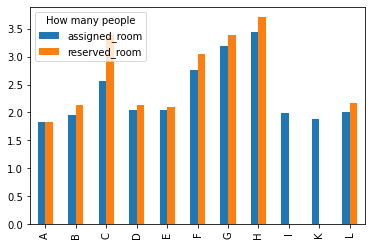

In [44]:
# adults , children , babies 값을 모두 합한 총 숙박인원(total_nums) 변수 생성
hotel['total_nums'] =  hotel['adults'] + hotel['children'] + hotel['babies']

# 방 타입 별 인원수 평균
people_by_a_room = hotel['total_nums'].groupby(hotel['assigned_room_type']).mean()
people_by_r_room = hotel['total_nums'].groupby(hotel['reserved_room_type']).mean()
people_by_room = pd.concat([people_by_a_room, people_by_r_room],axis=1,keys = ['assigned_room','reserved_room'],names=['How many people'])
people_by_room.plot.bar()

In [57]:
# 2. 예약한 방과 같은 객실을 배정받았는지에 관한 변수 생성
# 위의 내용을 기반으로 객실 등급 파악
# 가격은 reserved 기준 : A,B,I,K (1) < D,E,L (2) < C,F,G,H (3)

'''
코딩 하는중....
hotel['r_room_grade'] = hotel.loc[hotel.reserved_room_type == 'A'|'B'|'I'|'K'], inplace=True

hotel['a_room_grade'] = #np.where(hotel['reserved_']==hotel[],'0','1')
DG
SG
UG
'''

"\nhotel['r_room_grade'] = hotel.loc[hotel.reserved_room_type == 'A'|'B'|'I'|'K'], inplace=True\n\nhotel['a_room_grade'] = #np.where(hotel['reserved_']==hotel[],'0','1')\nDG\nSG\nUG\n"